<a href="https://colab.research.google.com/github/NoorHadiya/EDA-for-Medical-costs/blob/main/majpro2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#DATASET NAME - 'MEDICAL COSTS'
#DATASET PATH - '/content/insurance.csv'

In [ ]:
#DATAFRAME
import pandas as pd
df = pd.read_csv('/content/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.shape #TOTAL ROWS AND COLS

(1338, 7)

In [ ]:
df.size #TOTAL ELEMENTS IN DATAFRAME

9366

In [ ]:
df.info() #COMPLETE INFO ABOUT DATAFRAME

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum() #NULL VALUES

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.nunique() #UNIQUE VALUES IN EVERY COL

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

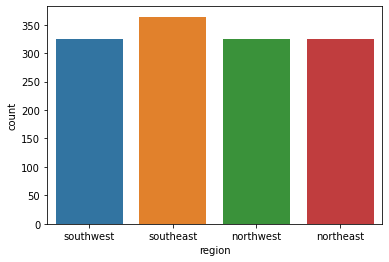

In [ ]:
#VISUALISATION USING SEABORN
import seaborn as sns
sns.countplot(x = 'region',data = df)

In [ ]:
df['region'].value_counts() #EXACT COUNT IN DIFFERENT REGIONS

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
df.sex.value_counts() #NO. OF MALE AND FEMALE

male      676
female    662
Name: sex, dtype: int64

In [ ]:
import numpy as np
southeast_m = np.sum((df['sex']=='male')&(df['region']=='southeast')) #COUNT OF MALE IN SOUTHEAST
southeast_f = np.sum((df['sex']=='female')&(df['region']=='southeast')) #COUNT OF FEMALE IN SOUTHEAST
print(southeast_m)
print(southeast_f)

189
175


In [ ]:
southwest_m_y = np.sum((df['region']=='southwest')&(df['sex']=='male')&(df['smoker']=='yes')) #MALE IN SOUTHWEST WHO SMOKES
southwest_m_n = np.sum((df['region']=='southwest')&(df['sex']=='male')&(df['smoker']=='no')) #MALE IN SOUTHWEST WHO DOESN'T SMOKE
southwest_f_y = np.sum((df['region']=='southwest')&(df['sex']=='female')&(df['smoker']=='yes')) #FEMALE IN SOUTHWEST WHO SMOKES
southwest_f_n = np.sum((df['region']=='southwest')&(df['sex']=='female')&(df['smoker']=='no')) #FEMALE IN SOUTHWEST WHO DOESN'T SMOKE
print(southwest_m_y)
print(southwest_m_n)
print(southwest_f_y)
print(southwest_f_n)

37
126
21
141


In [ ]:
smoker_y_se = np.sum((df['smoker']=='yes')&(df['region']=='southeast')) #SMOKERS IN SOUTHEAST
smoker_n_sw = np.sum((df['smoker']=='no')&(df['region']=='southwest')) #NON SMOKERS IN SOUTHWEST
smoker_y_ne = np.sum((df['smoker']=='yes')&(df['region']=='northeast')) #SMOKERS IN NORTHEAST
smoker_n_nw = np.sum((df['smoker']=='no')&(df['region']=='northwest')) #NON SMOKERS IN NORTHWEST
print(smoker_y_se)
print(smoker_n_sw)
print(smoker_y_ne)
print(smoker_n_nw)

91
267
67
267


In [ ]:
smoker_n_se = np.sum((df['smoker']=='no')&(df['region']=='southeast')) #NON SMOKERS IN SOUTHEAST
smoker_y_sw = np.sum((df['smoker']=='yes')&(df['region']=='southwest')) #SMOKERS IN SOUTHWEST
smoker_n_ne = np.sum((df['smoker']=='no')&(df['region']=='northeast')) #NON SMOKERS IN NORTHEAST
smoker_y_nw = np.sum((df['smoker']=='yes')&(df['region']=='northwest')) #SMOKERS IN NORTHWEST
print(smoker_n_se)
print(smoker_y_sw)
print(smoker_n_ne)
print(smoker_y_nw)

273
58
257
58


In [ ]:
df.groupby(['region','smoker']).size() #COUNT ON DIFF REGION'S SMOKERS AND NON SMOKERS

region     smoker
northeast  no        257
           yes        67
northwest  no        267
           yes        58
southeast  no        273
           yes        91
southwest  no        267
           yes        58
dtype: int64

In [ ]:
#AGE CLASSIFICATION
teen = np.sum((df['age']>=0)&(df['age']<20))
twenties = np.sum((df['age']>=20)&(df['age']<30))
thirties = np.sum((df['age']>=30)&(df['age']<40))
fourties = np.sum((df['age']>=40)&(df['age']<50))
fifties = np.sum((df['age']>=50)&(df['age']<60))
older = np.sum((df['age']>=60))
print(teen)
print(twenties)
print(thirties)
print(fourties)
print(fifties)
print(older)

137
280
257
279
271
114


In [ ]:
#CHILDREN CLASSIFICATION WITH DIFF AGES
ch_0 = np.sum((df['age']==18)&(df['children']==0))
ch_1 = np.sum((df['age']==19)&(df['children']==1))
ch_2 = np.sum((df['age']==52)&(df['children']==2))
ch_3 = np.sum((df['age']==55)&(df['children']==3))
ch_4 = np.sum((df['age']==48)&(df['children']==4))
ch_5 = np.sum((df['age']==39)&(df['children']==5))
print(ch_0)
print(ch_1)
print(ch_2)
print(ch_3)
print(ch_4)
print(ch_5)

51
11
8
4
3
4


In [ ]:
np.min(df['charges']) #MINIMUM CHARGES

1121.8739

In [ ]:
np.min(df['bmi']) #MINIMUM BODY MASS INDEX

15.96

In [ ]:
np.max(df['charges']) #MAXIMUM CHARGES

63770.42801

In [ ]:
np.max(df['bmi']) #MAXIMUM BODY MASS INDEX

53.13

In [ ]:
df.groupby(['age','children']).size() #COUNT ON DIFF AGE'S CHILDREN NUMBERS

age  children
18   0           51
     1            9
     2            6
     3            2
     4            1
                 ..
63   3            3
64   0           13
     1            3
     2            4
     3            2
Length: 219, dtype: int64